In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import os
import re
import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import src1.feature_extraction as fe
import src1.model_builder as mb
import src1.one_prediction as prediction
import src1.image_resize as resize
import pickle

In [5]:
train_list = fe.image_list('train_photos/')

Looking for images in 'kickflip'
Looking for images in 'ollie'


In [6]:
fe.extraction(train_list)

Processing train_photos/kickflip/color_new_IMG_1948.jpg...
Processing train_photos/kickflip/color_new_IMG_9372.jpg...
Processing train_photos/kickflip/rotate_new_IMG_9151.jpg...
Processing train_photos/kickflip/new_IMG_2137.jpg...
Processing train_photos/kickflip/rotate_new_IMG_9192.jpg...
Processing train_photos/kickflip/new_IMG_1944.jpg...
Processing train_photos/kickflip/color_images (43).jpg...
Processing train_photos/kickflip/new_IMG_9118.jpg...
Processing train_photos/kickflip/rotate_new_IMG_2146.jpg...
Processing train_photos/kickflip/color_new_IMG_1915.jpg...
Processing train_photos/ollie/rotate_images (41).jpg...
Processing train_photos/ollie/new_IMG_9251.jpg...
Processing train_photos/ollie/color_new_IMG_9032.jpg...
Processing train_photos/ollie/color_new_IMG_1756.jpg...
Processing train_photos/ollie/color_new_IMG_1725.jpg...
Processing train_photos/ollie/rotate_new_IMG_9325.jpg...
Processing train_photos/ollie/new_IMG_9258.jpg...
Extraction is completed. Please train the mod

In [3]:
with open('pickle_files/features.pkl', 'rb') as f:
    features = pickle.load(f)
with open('pickle_files/labels.pkl', 'rb') as l:
    labels = pickle.load(l)

In [8]:
mb.train_svm_classifer(features,labels)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=10, kernel=linear .............................................
[CV] C=10, kernel=linear .............................................
[CV] C=10, kernel=linear .............................................
[CV] C=10, ker

[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .............. C=10, kernel=linear, score=0.896679, total= 2.0min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .............. C=10, kernel=linear, score=0.881919, total= 2.0min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .............. C=10, kernel=linear, score=0.897059, total= 2.0min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ............ C=1000, kernel=linear, score=0.896679, total= 2.0min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ............ C=1000, kernel=linear, score=0.918819, total= 2.0min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ............. C=100, kernel=linear, score=0.886447, total= 2.0min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ............. C=100, kernel=linear, score=0.918819, total= 2.0min
[CV] C

[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=1, gamma=1e-05, kernel=rbf, score=0.553506, total= 4.1min
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.948339, total= 4.3min
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .... C=1, gamma=0.0001, kernel=rbf, score=0.568266, total= 4.5min
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.937729, total= 4.6min
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV] .... C=1, gamma=0.0001, kernel=rbf, score=0.583026, total= 4.5min
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV] .... C=1, gamma=0.0001, kernel=rbf, score=0.575646, total= 4.5min
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.937269, total= 4.6min
[CV] C

[Parallel(n_jobs=64)]: Done 140 out of 200 | elapsed: 10.3min remaining:  4.4min


[CV] .. C=100, gamma=0.0001, kernel=rbf, score=0.926471, total= 2.8min
[CV] .... C=10, gamma=1e-05, kernel=rbf, score=0.575646, total= 4.8min
[CV] .... C=10, gamma=1e-05, kernel=rbf, score=0.586716, total= 4.8min
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.940959, total= 4.3min
[CV] .... C=10, gamma=1e-05, kernel=rbf, score=0.575646, total= 4.8min
[CV] .... C=10, gamma=1e-05, kernel=rbf, score=0.571956, total= 4.8min
[CV] .... C=10, gamma=1e-05, kernel=rbf, score=0.568266, total= 4.8min
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.937269, total= 4.6min
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.937269, total= 4.6min
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.948339, total= 4.6min
[CV] . C=1000, gamma=0.0001, kernel=rbf, score=0.901099, total= 1.7min
[CV] .. C=1000, gamma=0.001, kernel=rbf, score=0.926740, total= 2.3min
[CV] .. C=1000, gamma=0.001, kernel=rbf, score=0.933824, total= 2.2min
[CV] .. C=1000, gamma=0.001, kernel=rbf, score=0.915751, total= 2.3min
[CV] .

[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed: 12.0min finished



The Best Parameters:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Classification report:
             precision    recall  f1-score   support

   kickflip       0.92      0.97      0.94       379
      ollie       0.95      0.90      0.93       300

avg / total       0.94      0.94      0.94       679



Processing project_photos/one_prediction/predicted.jpg...

Your prediction...
['kickflip'] 0.663700759219


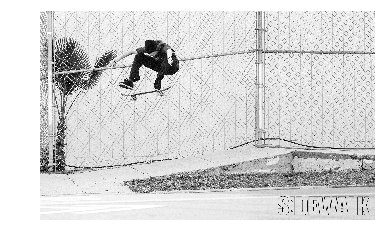

In [8]:
prediction.predict_one('test_photos/kickflip-test-4.jpg')